# Tugas Proyek Individu
#### Author: Maxwell Zefanya Ginting / 2306221200

## 1. Pendahuluan: Pemilihan dataset & validasi
Data yang diambil untuk tugas proyek individu ini adalah data HR Employee Attrition untuk IBM    

In [1]:
import numpy as py
import pandas as pd
import matplotlib as mp
from scipy.stats import f_oneway

# import data (disertakan dalam file zip)
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 2. Preprocessing & Pembersihan Data
Sebelum data diproses, pertama perlu dilakukan data cleaning terlebih dahulu  
Data cleaning dilakukan dengan cara menghapus data yang bersifat null, dan menggantikannya dengan 0, serta menghapus data yang bersifat duplikat  

In [2]:
data.dropna()
data.fillna(0)
data = data.drop_duplicates()
duplicate = data.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

Pada tabel dibawah bisa dilihat beberapa fakta penting mengenai pegawai di IBM, seperti rata-rata umur pegawai, rata-rata gaji per bulan, dan sebagainya

In [3]:
data.describe().round(3)[['Age', 'MonthlyRate', 'YearsAtCompany', 'JobSatisfaction']]

,Age,MonthlyRate,YearsAtCompany,JobSatisfaction
count,1470.000,1470.000,1470.000,1470.000
mean,36.924,14313.103,7.008,2.729
std,9.135,7117.786,6.127,1.103
min,18.000,2094.000,0.000,1.000
25%,30.000,8047.000,3.000,2.000
50%,36.000,14235.500,5.000,3.000
75%,43.000,20461.500,9.000,4.000
max,60.000,26999.000,40.000,4.000


Pada proyek kali ini, data yang ingin diambil adalah hubungan antara umur, gender, lama kerja serta gaji yang didapatkan pada IBM.  
Oleh karena itu, akan dibentuk tabel baru dengan isi kolom yaitu
- umur
- gender
- pendapatan per bulan
- lama bekerja di perusahaan

In [4]:
data_features = data[['Age', 'Gender', 'MonthlyIncome', 'YearsAtCompany']]
data_features

,Age,Gender,MonthlyIncome,YearsAtCompany
0,41,Female,5993,6
1,49,Male,5130,10
2,37,Male,2090,0
3,33,Female,2909,8
4,27,Male,3468,2
...,...,...,...,...
1465,36,Male,2571,5
1466,39,Male,9991,7
1467,27,Male,6142,6
1468,49,Male,5390,9


Pada tabel diatas, terdapat 1 kolom yang memiliki value kategorikal, yaitu gender. Supaya analisa bisa dipermudah, maka akan dibentuk one hot encoding untuk gender.  

Namun, sebelum data di-encode, perlu dilhat terlebih dahulu value apa saja yang akan di-encode  

In [5]:
genders = data['Gender'].unique()
print("Genders: ", genders)

Genders:  ['Female' 'Male']


Barulah bisa dibentuk tabel dimana data sudah di-encode

In [6]:
encoded = pd.get_dummies(data, columns=['Gender'])
data_features = encoded[['Age', 'Gender_Male', 'Gender_Female', 'MonthlyIncome', 'JobRole', 'YearsAtCompany']]
data_features

,Age,Gender_Male,Gender_Female,MonthlyIncome,JobRole,YearsAtCompany
0,41,False,True,5993,Sales Executive,6
1,49,True,False,5130,Research Scientist,10
2,37,True,False,2090,Laboratory Technician,0
3,33,False,True,2909,Research Scientist,8
4,27,True,False,3468,Laboratory Technician,2
...,...,...,...,...,...,...
1465,36,True,False,2571,Laboratory Technician,5
1466,39,True,False,9991,Healthcare Representative,7
1467,27,True,False,6142,Manufacturing Director,6
1468,49,True,False,5390,Sales Executive,9


Tabel inilah yang akan dipakai untuk keperluan proyek pada tahapan berikutnya.  

## 3. Statistik Deskriptif

Seperti yang telah dijelaskan pada bagian sebelumnya, akan dianalisa hubungan antara umur, gender, lama kerja serta gaji yang didapatkan pada IBM.  
Namun sebelum masuk ke bagian tersebut, akan dijabarkan terlebih dahulu data yang dimiliki secara deskriptif    

Pertama, akan dilihat hubungan antara lama tahun di perusahaan dengan gaji per bulan

In [7]:
data_features.describe().round(3)[['Age', 'MonthlyIncome', 'YearsAtCompany']]
print(data_features.describe().round(3)[['MonthlyIncome']])

       MonthlyIncome
count       1470.000
mean        6502.931
std         4707.957
min         1009.000
25%         2911.000
50%         4919.000
75%         8379.000
max        19999.000


Bisa dilihat bahwa terdapat banyak rentang variasi antara pegawai IBM. Terdapat rentang sekitar $18990 antara pegawai dengan gaji terendah dengan gaji tertinggi.  

Karena rentang yang besar, maka perlu dilihat apakah ada pengaruh yang menyebabkan rentang tersebut menjadi besar. Untuk proyek ini akan dilihat hubungan gaji dengan lama bekerja. Namun pada saat ini yang dilihat adalah data secara visual  

<Axes: xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

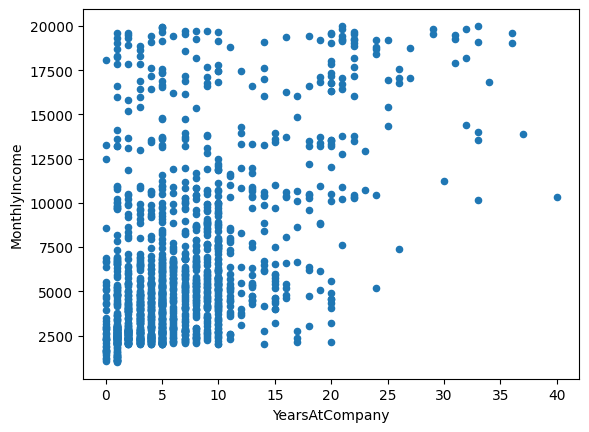

In [8]:
data_features.plot.scatter(x='YearsAtCompany',
                           y='MonthlyIncome')

Melalui plot yang ada, secara visual tidak terlihat korelasi yang kuat antara lama kerja dengan pendapatan.  

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

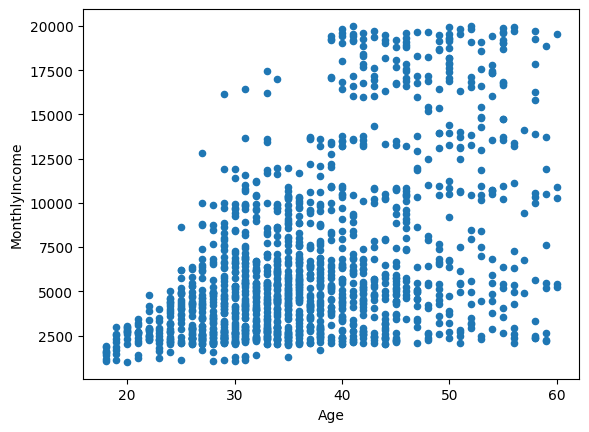

In [9]:
data_features.plot.scatter(x='Age',
                           y='MonthlyIncome')

Namun bila dilihat secara umur, maka secara visual bisa sedikit terlihat korelasi antara umur dengan pendapatan  

Selain itu, bisa juga dilakukan statistik deskriptif dengan membandingkan gaji berdasarkan gender

In [10]:
part3_males = data_features[data_features['Gender_Male'] == True]
part3_females = data_features[data_features['Gender_Female'] == True]
print('Male\n', part3_males.describe().round(3))
print('\nFemale\n', part3_females.describe().round(3))

Male
            Age  MonthlyIncome  YearsAtCompany
count  882.000        882.000         882.000
mean    36.653       6380.508           6.859
std      9.042       4714.857           6.206
min     18.000       1009.000           0.000
25%     30.000       2819.500           3.000
50%     35.000       4837.500           5.000
75%     42.000       8113.750           9.000
max     60.000      19999.000          37.000

Female
            Age  MonthlyIncome  YearsAtCompany
count  588.000        588.000         588.000
mean    37.330       6686.566           7.231
std      9.266       4695.609           6.004
min     18.000       1129.000           0.000
25%     31.000       3037.000           3.000
50%     36.000       5081.500           5.000
75%     44.000       8711.750          10.000
max     60.000      19973.000          40.000


Secara kasat mata dapat dilihat bahwa meskipun jumlah pegawai wanita lebih sedikit ketimbang pegawai pria, parameter lainnya seperti gaji dan lama kerja tidak begitu besar 

## 4. Statistik Inferensial

Pada bagian sebelumnya disajikan berbagai hipotesis yang didapatkan berdasarkan statistik deskriptif. Namun, hipotesis tersebut perlu diuji kebenarannya. Pada bagian ini, hipotesis yang akan diuji ada 3, yaitu
- Terdapat hubungan antara lama bekerja dengan gaji
- Terdapat hubungan antara umur dengan gaji
- Terdapat perbedaan signifikan antara gaji wanita dengan gaji pria

Dua hipotesis awal akan diuji menggunakan uji korelasi Pearson, sedangkan hipotesis terakhir diuji menggunakan ANOVA.  
Sedangkan hipotesis ketiga akan diuji terhadap tingkat signifikansi $\alpha$ = 0.05  

Sumber nilai guideline hipotesis:
- https://www.scribbr.com/statistics/pearson-correlation-coefficient/
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Interpretation

#### Hipotesis A: Terdapat hubungan antara lama bekerja dengan gaji
Note: Untuk hipotesis pertama dan kedua, akan mengikuti guideline untuk korelasi Pearson, yaitu
- Korelasi 0 s.d. 0.3 menandakan korelasi yang sangat lemah
- Korelasi 0.3 s.d. 0.5 menandakan korelasi yang lemah
- Korelasi 0.5 s.d. 0.9 menandakan korelasi yang kuat
- Korelasi 0.9 s.d. 1 menandakan korelasi yang sangat kuat
  
Nilai ini dipilih sebagai guideline karena sifat data yang memiliki banyak faktor yang bisa memengaruhi nilai, seperti tingkat pendidikan, status pernikahan, role pekerjaan, dan sebagainya (sumber ada di bagian bawah).  

Sumber:  
- https://www.scribbr.com/statistics/pearson-correlation-coefficient/
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

In [11]:
part4_hipA = data_features[['MonthlyIncome', 'YearsAtCompany']]
print("Correlation\n", part4_hipA.corr(min_periods=1)[['YearsAtCompany']])

Correlation
                 YearsAtCompany
MonthlyIncome         0.514285
YearsAtCompany        1.000000


Melalui tabel diatas, dapat dilihat bahwa nilai korelasi yang ditemukan antara lama bekerja dengan besar gaji menggunakan metode Pearson bernilai ~0.51. Meskipun nilai korelasi secara teknis menandakan bahwa korelasi kuat, namun karena nilainya berada dekat kepada 0.5, maka korelasi tidak begitu kuat. Meskipun begitu, kesimpulan yang diambil dari tes korelasi ini adalah bahwa memang terdapat hubungan antara lamanya bekerja dengan jumlah gaji yang diterima.  

##### Kesimpulan: Hipotesis diterima, memang terdapat hubungan antara lama bekerja dengan gaji

#### Hipotesis B: Terdapat hubungan antara umur pekerja dengan gaji
Sama seperti hipotesis sebelumnya, metode yang digunakan untuk membandingkan korelasi Pearson.  
Perbedaannya data yang dibandingkan pada hipotesis ini adalah umur pekerja terhadap gaji

In [12]:
part4_hipB = data_features[['Age', 'YearsAtCompany']]
print("Correlation\n", part4_hipB.corr(min_periods=1)[['YearsAtCompany']])

Correlation
                 YearsAtCompany
Age                   0.311309
YearsAtCompany        1.000000


Melalui tabel diatas, dapat dilihat bahwa nilai korelasi yang ditemukan antara umur dengan besar gaji menggunakan metode Pearson bernilai ~0.31. Menggunakan guideline yang ada di atas, maka bisa dibilang bahwa korelasi antara umur dengan besar gaji itu adalah rendah.  Artinya, tidak ada bukti kuat yang menandakan bahwa kenaikan umur ada hubungannya dengan kenaikan gaji seorang pegawai. Oleh karena itu, kesimpulan yang diambil dari tes korelasi ini adalah bahwa tidak ada korelasi antara umur dengan besar gaji pegawai.  

##### Kesimpulan: Hipotesis ditolak, korelasi antara gaji dengan umur ukurannya rendah

#### Hipotesis C: Terdapat perbedaan signifikan antara gaji wanita dengan gaji pria
Pada kasus hipotesis ini, akan dilakukan pengujian menggunakan ANOVA untuk mencari apakah memang ada perbedaan yang signifikan antara gaji pegawai laki-laki dengan gaji pegawai perempuan.  

Analisa akan dilakukan dengan patokan nilai signifikansi $\alpha$ sebesar 0.05

In [13]:
part4_males = data_features[data_features['Gender_Male'] == True]['MonthlyIncome']
part4_females = data_features[data_features['Gender_Female'] == True]['MonthlyIncome']

f, p = f_oneway(part4_males, part4_females)
print("f: ", f)
print("p: ", p)

f:  1.4914802153292723
p:  0.22218303455087515


Hipotesis akan ditolak bila nilai $\alpha$ lebih besar dari nilai p yang ditemukan. Dari hasil analisa, terlihat bahwa nilai p berada pada angka ~0.22. Oleh karena itu, hipotesis awal ditolak, dimana hasil yang dapat diambil dari analisa ini adalah bahwa tidak terdapat bukti yang signifikan untuk menunjukkan bahwa ada perbedaan gaji yang signifikan antara pegawai wanita dan pria. Hasil analisa ini bisa menguatkan fakta bahwa tidak terdapat diskriminasi gender secara menyeluruh pada perusahaan IBM.  

##### Kesimpulan: Hipotesis ditolak. Bukti yang ada menunjukkan bahwa malah tidak terdapat perbedaan yang signifikan antara gaji pegawai pria dengan wanita

## 5. Eksplorasi Data & Visualisasi

Pada bagian ini akan dilakukan eksplorasi kepada data secara lebih mendalam serta memberikan berbagai visualisasinya. Eksplorasi data mendalam sendiri akan berpusat terhadap data yang telah diberikan dari awal dan dipakai sampai bagian sebelumnya, yaitu data pegawai dari IBM. Secara garis besar, bagian ini akan menganalisa berbagai aspek lain pada data yang belum sempat dianalisa pada bagian sebelumnya bersama aspek numerik pada data yang sempat dianalisa pada bagian sebelumnya. Analisa data ini akan relatif lebih singkat ketimbang analisa data pada keempat bagian sebelumnya.  

#### Part 1: Analisa central tendency dari data
Data IBM sendiri penuh akan data numerik yang memiliki hasil menarik di-dalamnya. Pada bagian ini, akan dianalisa berbagai aspek central tendency untuk data yang berhubungan dengan keuangan setiap pegawai IBM. Data tersebut adalah:  

In [14]:
part5_data = data[['Age', 'MonthlyIncome', 'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobSatisfaction']]
part5_data

,Age,MonthlyIncome,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,JobSatisfaction
0,41,5993,0,6,0,4
1,49,5130,1,10,1,2
2,37,2090,0,0,0,3
3,33,2909,0,8,3,3
4,27,3468,1,2,2,2
...,...,...,...,...,...,...
1465,36,2571,1,5,0,4
1466,39,9991,1,7,1,1
1467,27,6142,1,6,0,2
1468,49,5390,0,9,0,2


Menggunakan data ini akan dilakukan analisa central tendency, dimana ditemukan bahwa

In [15]:
part5_data.describe().round(3)

,Age,MonthlyIncome,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,JobSatisfaction
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,6502.931,0.794,7.008,2.188,2.729
std,9.135,4707.957,0.852,6.127,3.222,1.103
min,18.000,1009.000,0.000,0.000,0.000,1.000
25%,30.000,2911.000,0.000,3.000,0.000,2.000
50%,36.000,4919.000,1.000,5.000,1.000,3.000
75%,43.000,8379.000,1.000,9.000,3.000,4.000
max,60.000,19999.000,3.000,40.000,15.000,4.000


Karena sifat perusahaan IBM yang memiliki banyak pegawai, maka dapat dilihat pada hasil bahwa ukuran deviasi standar cukup besar. Oleh karena itu, aspek yang paling tepat untuk diambil menjadi deskripsi data secara keseluruhan adalah mediannya.  

Bila dijabarkan, maka median keenam kolom data adalah sebagai berikut

In [16]:
print(part5_data.median())
print("\n")
print(part5_data.quantile(0.75))

Age                          36.0
MonthlyIncome              4919.0
StockOptionLevel              1.0
YearsAtCompany                5.0
YearsSinceLastPromotion       1.0
JobSatisfaction               3.0
dtype: float64


Age                          43.0
MonthlyIncome              8379.0
StockOptionLevel              1.0
YearsAtCompany                9.0
YearsSinceLastPromotion       3.0
JobSatisfaction               4.0
Name: 0.75, dtype: float64


Melalui median, dapat ditemukan fakta bahwa sebagian 50% gaji perbulan karyawan IBM kurang dari \\$4919, dan sebagian besar, yaitu 75% dari pegawai memiliki gaji dibawah \\$8379. Dapat juga ditemukan bahwa sebagian besar pegawai memiliki umur dibawah 43 tahun.  


#### Part 2: Visualisasi data
Bila data tersebut di-plot, maka data akan terlihat seperti berikut:  

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

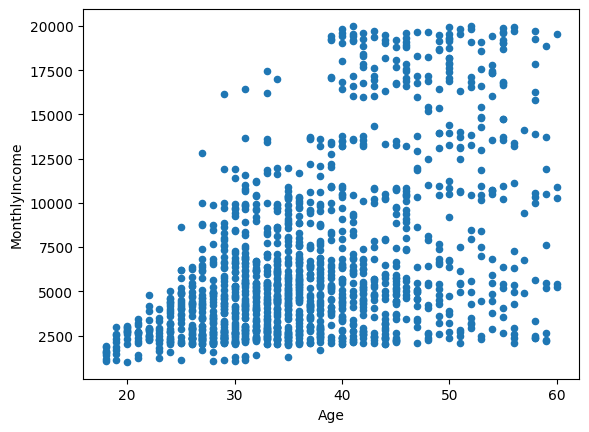

In [17]:
data_features.plot.scatter(x='Age',
                           y='MonthlyIncome')

Seperti yang telah dijelaskan pada bagian sebelumnya, korelasi tidak terlalu besar antara usia dan gaji dari karyawan

#### Sekian adalah presentasi proyek tugas individu dari saya. Terimakasih